In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats
from scipy.integrate import simpson
import numpy as np

In [6]:
#functions
def clean_and_transpose(df, start_row=32, end_row=106):
    new_df = df.iloc[start_row:end_row]
    df_transposed = new_df.T
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed[1:]
    df_transposed.index = pd.to_numeric(df_transposed.iloc[:, 0], errors='coerce') / 3600
    cleaned_df = df_transposed.iloc[:, 2:]
    cleaned_df.columns.name = 'Series'
    cleaned_df = cleaned_df.apply(pd.to_numeric, errors='coerce')
    return cleaned_df

def plot_timeseries(dataframe, title = None):
    plt.figure(figsize=(11, 6))
    for column in dataframe.columns:
        sns.scatterplot(data=dataframe, x=dataframe.index, y=dataframe[column], label=column, s=11)
    plt.xlabel('Time (hr)')
    plt.ylabel('OD reading') 
    plt.title(title)
    plt.legend(title='Series', bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=3)
    plt.tight_layout() 
    plt.show()

In [8]:
df_24 = pd.read_csv('/Users/kelly/Desktop/KH_RBG_12092024.csv')
df_clean = clean_and_transpose(df_24, 31, 129)
df_clean

Series,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time [s],,,,,,,,,,,,,,,,,,,,,
0.000000,0.2549,0.2510,0.2188,0.2563,0.2507,0.2605,0.2071,0.2272,0.2194,0.2213,...,0.2010,0.1897,0.1871,0.2158,0.1777,0.1765,0.1684,0.1713,0.1674,0.1712
0.250028,0.2666,0.2890,0.2312,0.2987,0.3135,0.2953,0.2262,0.2520,0.2469,0.2469,...,0.2108,0.2091,0.1966,0.2343,0.2088,0.2159,0.1939,0.1989,0.1937,0.1889
0.500056,0.2940,0.3187,0.2233,0.3450,0.3289,0.3129,0.2297,0.2882,0.2635,0.2686,...,0.2259,0.2197,0.2076,0.2510,0.2351,0.2455,0.2119,0.2136,0.2102,0.1948
0.750056,0.3106,0.3525,0.2409,0.3578,0.3627,0.3236,0.2511,0.3285,0.2780,0.2884,...,0.2339,0.2269,0.2152,0.2648,0.2531,0.2609,0.2207,0.2224,0.2165,0.1983
1.000083,0.3193,0.3868,0.2442,0.3899,0.3815,0.3410,0.2663,0.3412,0.2966,0.3030,...,0.2363,0.2323,0.2244,0.2692,0.2703,0.2762,0.2322,0.2344,0.2223,0.2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.752167,0.4958,0.5047,0.5228,0.5029,0.4911,0.5022,0.5093,0.5205,0.5002,0.4681,...,0.4689,0.4726,0.4846,0.4844,0.4947,0.4701,0.4388,0.4195,0.4489,0.4033
23.002194,0.5000,0.4988,0.5290,0.4998,0.4846,0.4979,0.5143,0.5345,0.4907,0.4688,...,0.4719,0.4773,0.4863,0.4863,0.4904,0.4860,0.4398,0.4136,0.4487,0.4002
23.252222,0.4992,0.5006,0.5322,0.4926,0.4920,0.5059,0.5177,0.5287,0.4928,0.4717,...,0.4757,0.4775,0.4889,0.4889,0.4972,0.4825,0.4437,0.4250,0.4551,0.4116


In [36]:
nophage = df_clean.filter(regex=r'^[A-H][1-6]$')
tenthousandphage =  df_clean.filter(regex=r'^[A-H](?:[7-9]|1[0-2])$')

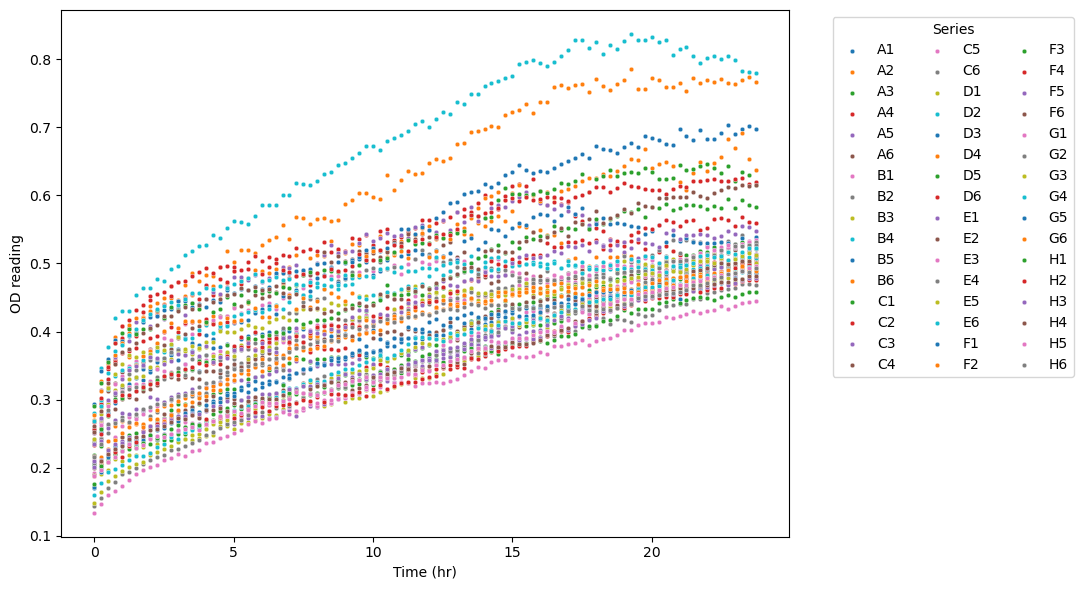

In [10]:
plot_timeseries(nophage)

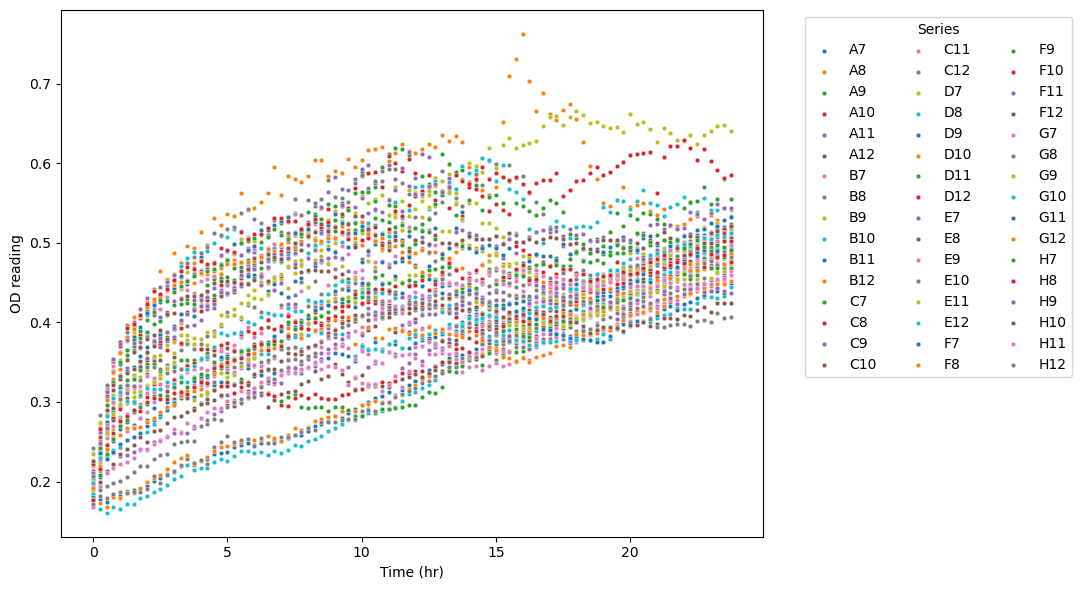

In [11]:
plot_timeseries(tenthousandphage)

In [45]:
nophage_endpoint = pd.DataFrame({
    '15 min': nophage.iloc[0],
    '24 hr': nophage.iloc[-1]
})

phage_endpoint = pd.DataFrame({
    '15 min': tenthousandphage.iloc[0],
    '24 hr': tenthousandphage.iloc[-1]
})

nophage_endpoint = nophage_endpoint[(nophage_endpoint['15 min'] < 0.25) & (nophage_endpoint['15 min'] > 0.15)]
phage_endpoint = phage_endpoint[(phage_endpoint['15 min'] < 0.25) & (phage_endpoint['15 min'] > 0.15)]
nophage_val

array([0.21879999, 0.2111    , 0.2415    , 0.1883    , 0.207     ,
       0.2041    , 0.23630001, 0.189     , 0.1996    , 0.19239999,
       0.2062    , 0.2384    , 0.20909999, 0.21690001, 0.23999999,
       0.2379    , 0.2421    , 0.1697    , 0.1885    , 0.2341    ,
       0.2335    , 0.2343    , 0.1603    , 0.17209999, 0.1872    ,
       0.1754    , 0.18970001, 0.20100001, 0.18970001, 0.18709999,
       0.2158    ])

In [46]:
nophage_val = nophage_endpoint['15 min'].values
nophage_T = nophage.T
nophage_T = nophage_T[nophage_T.iloc[:, 0].isin(nophage_val)]
nophage_TT = nophage_T.T
nophage_TT

phage_val = phage_endpoint['15 min'].values
phage_T = tenthousandphage.T
phage_T = phage_T[phage_T.iloc[:, 0].isin(phage_val)]
phage_TT = phage_T.T
phage_TT

Series,A7,A8,A9,A10,A11,A12,B7,B8,B9,B10,...,G9,G10,G11,G12,H7,H8,H9,H10,H11,H12
Time [s],,,,,,,,,,,,,,,,,,,,,
0.000000,0.2071,0.2272,0.2194,0.2213,0.2203,0.2127,0.1860,0.1842,0.1894,0.1842,...,0.1989,0.1976,0.1809,0.1921,0.1777,0.1765,0.1684,0.1713,0.1674,0.1712
0.250028,0.2262,0.2520,0.2469,0.2469,0.2393,0.2365,0.2102,0.2170,0.2233,0.1650,...,0.2126,0.2290,0.2058,0.2200,0.2088,0.2159,0.1939,0.1989,0.1937,0.1889
0.500056,0.2297,0.2882,0.2635,0.2686,0.2605,0.2594,0.2298,0.2397,0.2468,0.1607,...,0.2611,0.2826,0.2281,0.2404,0.2351,0.2455,0.2119,0.2136,0.2102,0.1948
0.750056,0.2511,0.3285,0.2780,0.2884,0.2797,0.2779,0.2355,0.2566,0.2655,0.1685,...,0.2846,0.3055,0.2374,0.2552,0.2531,0.2609,0.2207,0.2224,0.2165,0.1983
1.000083,0.2663,0.3412,0.2966,0.3030,0.3037,0.2946,0.2417,0.2715,0.2811,0.1658,...,0.2978,0.3123,0.2468,0.2591,0.2703,0.2762,0.2322,0.2344,0.2223,0.2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.752167,0.5093,0.5205,0.5002,0.4681,0.4775,0.4870,0.4667,0.4878,0.5189,0.4881,...,0.4669,0.4316,0.4344,0.4433,0.4947,0.4701,0.4388,0.4195,0.4489,0.4033
23.002194,0.5143,0.5345,0.4907,0.4688,0.4724,0.4820,0.4684,0.5003,0.5092,0.4963,...,0.4555,0.4319,0.4392,0.4464,0.4904,0.4860,0.4398,0.4136,0.4487,0.4002
23.252222,0.5177,0.5287,0.4928,0.4717,0.4724,0.4834,0.4741,0.5115,0.5255,0.4964,...,0.4637,0.4308,0.4401,0.4529,0.4972,0.4825,0.4437,0.4250,0.4551,0.4116


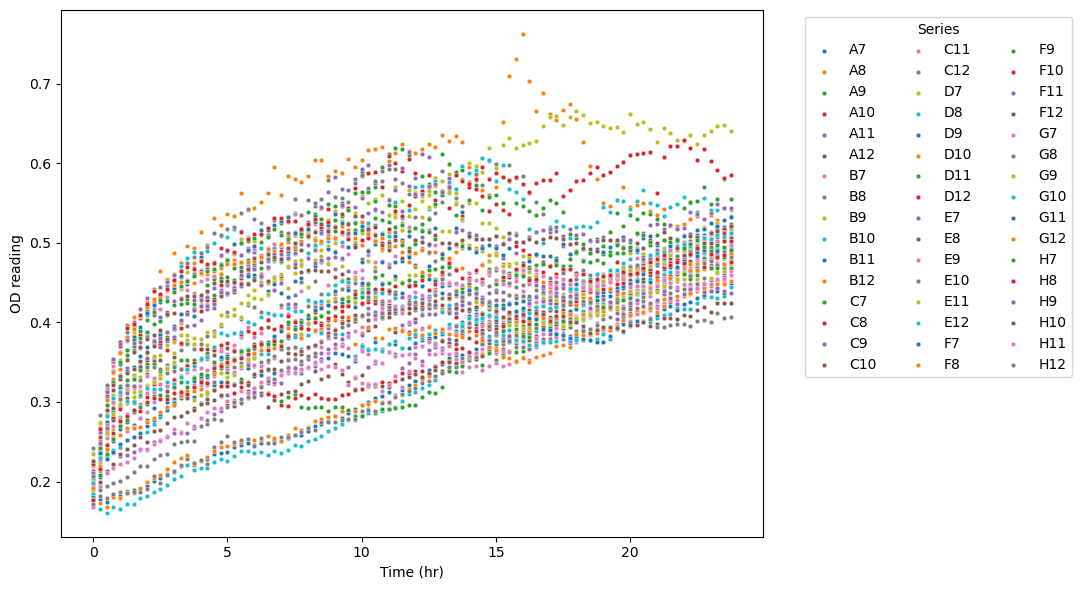

In [47]:
plot_timeseries(phage_TT)

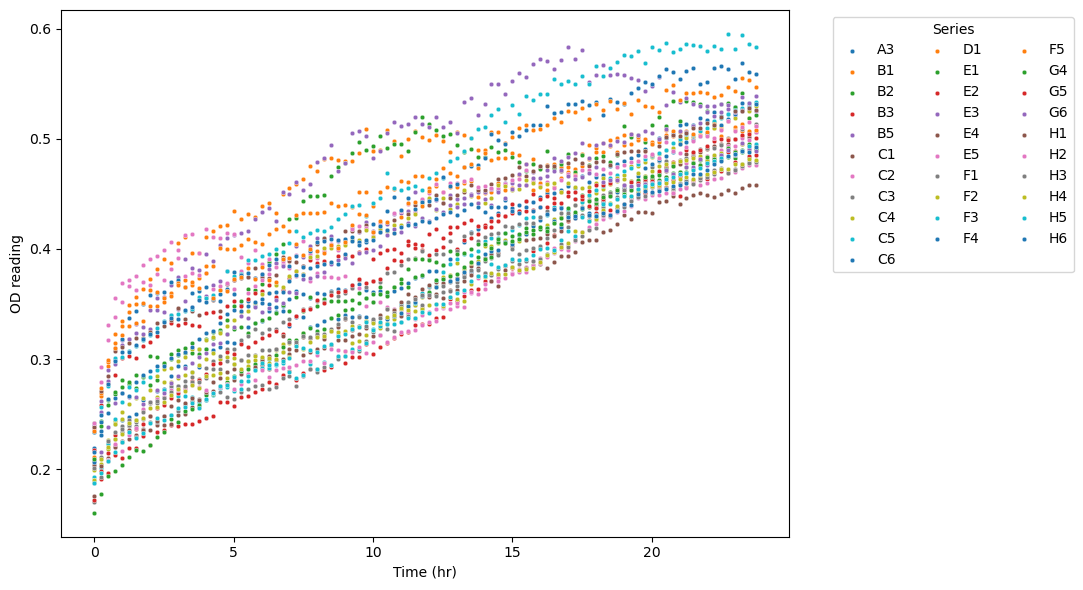

In [48]:
plot_timeseries(nophage_TT)

In [49]:
auc_values_nophage = {col: np.trapz(nophage[col], x=nophage.index) for col in nophage.columns}

auc_values_tenthousandphage = {col: np.trapz(tenthousandphage[col], x=tenthousandphage.index) for col in tenthousandphage.columns}

Text(0.5, 1.0, 'no phage')

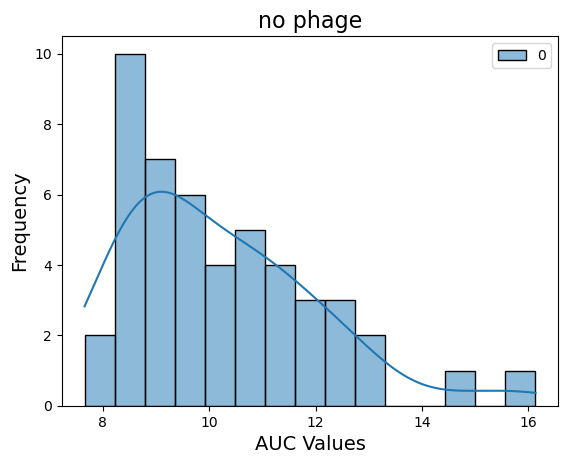

In [50]:
sns.histplot(auc_values_nophage.values(), bins=15, kde=True)
plt.xlabel('AUC Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('no phage', fontsize=16)

Text(0.5, 1.0, '10^4 phage')

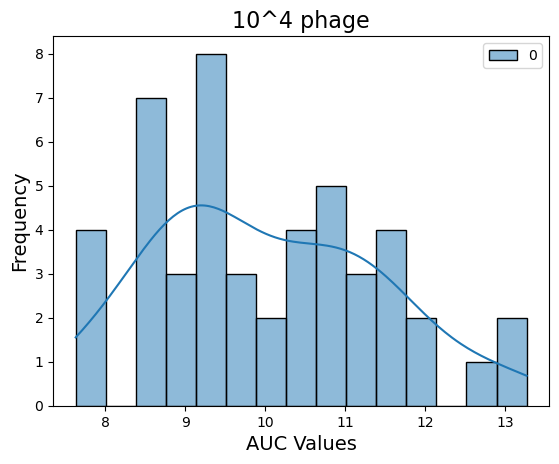

In [51]:
sns.histplot(auc_values_tenthousandphage.values(), bins=15, kde=True)
plt.xlabel('AUC Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('10^4 phage', fontsize=16)

In [52]:
from scipy import stats
#null: not normal 
#alt: normal

auc_values_list_nophage = list(auc_values_nophage.values())

stats.normaltest(auc_values_list_nophage)

NormaltestResult(statistic=12.382712606983526, pvalue=0.0020470484506299523)

In [53]:
auc_values_list_tenthousandphage = list(auc_values_tenthousandphage.values())

stats.normaltest(auc_values_list_tenthousandphage)

NormaltestResult(statistic=1.9202802797616265, pvalue=0.3828392311713841)